In [2]:
# Standard imports
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd


# SMLB imports
# from smlb.learners.scikit_learn.random_forest_regression_sklearn import RandomForestRegressionSklearn
# from smlb.learners.lolo.random_forest_regression_lolo import RandomForestRegressionLolo
# from smlb.learners.scikit_learn.gaussian_process_regression_sklearn import GaussianProcessRegressionSklearn
# from smlb.features.matminer_composition import MatminerCompositionFeatures
# from smlb.core.metrics import RootMeanSquaredError, MeanLogPredictiveDensity
# from smlb import IdentityFeatures
# from smlb.core.metrics import UncertaintyCorrelation, StandardConfidence, RootMeanSquareStandardizedResiduals

# Import dataset and examine

In [ ]:
from deepchem.feat import MolecularFeaturizer as DeepChemMolecularFeaturizer
from smlb.core.features import Features
from smlb import params
from smlb.core.data import Data
from smlb.core.tabular_data import TabularData

class DeepChemFeaturizer(Features):
    def __init__(
        self,
        dc_featurizer: DeepChemMolecularFeaturizer,
        **kwargs
    ):
    
        super().__init__(**kwargs)
        self.dc_featurizer = dc_featurizer
        
    def apply(self, data: Data) -> TabularData:
        
        data = params.instance(data, Data)

        features = self.dc_featurizer.featurize(data.samples())
        
        result = (
            TabularData(data=features, labels=data.labels())
            if data.is_labeled
            else TabularData(data=features)
        )
        
        return result

In [3]:
prop = 'homo'

Here, we've selected the LUMO (Lowest Unoccupied Molecular Orbital) property from QM9. This is a measure of the thermodynamic tendency for the molecule to be reduced (accept an electron), and is an important property for electrochemical applications. In this example, we'll seek to find molecules which minimize the LUMO.

In [15]:
from smlb.datasets.experimental.qm9_ramakrishnan_etal14.qm9_ramakrishnan_etal14 import Qm9RamakrishnanEtAl2014Dataset
_qm9_filename = '/Users/jkoeller/Git Repos/smlb/datasets/experimental/qm9_ramakrishnan_etal14/gdb9-14b.zip'
QM9_dataset = Qm9RamakrishnanEtAl2014Dataset(source=_qm9_filename, samplef=lambda arg: arg["smiles_gdb9"], labelf=lambda arg:arg[prop])

In [16]:
QM9_dataset.samples()[0:2]

array([('C',), ('N',)], dtype=[('Samples', 'O')])

In [17]:
# This really shouldn't be needed.
# I don't understand where we specify which of the inputs we want to be the "smiles" input,
# And which of the outputs is the output of interest, 
# OR how to just get a single label or input.
QM9_dataset = TabularData(data=np.array([v[0] for v in QM9_dataset.samples()]), labels=np.array([v[0] for v in QM9_dataset.labels()]))

In [18]:
from deepchem.feat import RDKitDescriptors
dcfeat = DeepChemFeaturizer(RDKitDescriptors())

In [19]:
# This will take a few minutes
QM9_featurized = dcfeat.apply(QM9_dataset)

In [20]:
pickle.dump(QM9_featurized, open(f'/Users/jkoeller/Git Repos/smlb/datasets/experimental/qm9_ramakrishnan_etal14/QM9_RDKitDescriptorsFeatures_{prop}.p', 'wb'))

In [4]:
# Start here if you are loading a pre-featurized version of the dataset
QM9_featurized = pickle.load(open(f'/Users/jkoeller/Git Repos/smlb/datasets/experimental/qm9_ramakrishnan_etal14/QM9_RDKitDescriptorsFeatures_{prop}.p', 'rb'))

In [5]:
QM9_featurized.labels().shape

(133885,)

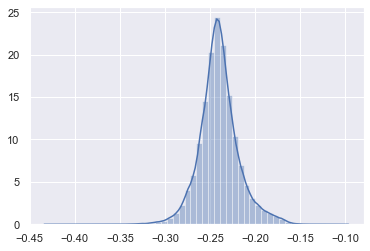

In [6]:
# Examine
sns.distplot(QM9_featurized.labels())
plt.show()

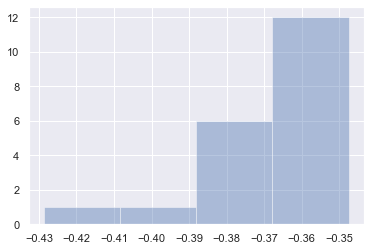

In [7]:
# Examine the high-performers specifically (low LUMO)
sns.distplot(np.sort(QM9_featurized.labels())[:20], kde=False)
plt.show()